In [12]:
import pandas as pd

# CSV 파일 읽기
df1 = pd.read_csv("./bulkdata/co2.csv")
df1 = df1[['year', 'month', 'monthly_average']]

# 결측값 제거
df1 = df1.dropna(subset=['monthly_average'])

# 연도별 평균 계산
co2 = df1.groupby('year')['monthly_average'].mean().reset_index()
print(co2)


    year  monthly_average
0   1958       315.237000
1   1959       315.981667
2   1960       316.908333
3   1961       317.643333
4   1962       318.453333
..   ...              ...
63  2021       416.414167
64  2022       418.528333
65  2023       421.075833
66  2024       424.604167
67  2025       426.870000

[68 rows x 2 columns]


In [14]:
# CSV 파일 읽기
df2 = pd.read_csv("./bulkdata/temperature.csv")
df2 = df2[['year', 'temperature']]

# 결측값 제거
temperature = df2.dropna(subset=['temperature'])
print(temperature)

     year  temperature
0    1880        -0.18
1    1881        -0.10
2    1882        -0.12
3    1883        -0.18
4    1884        -0.29
..    ...          ...
140  2020         1.01
141  2021         0.85
142  2022         0.89
143  2023         1.17
144  2024         1.28

[145 rows x 2 columns]


In [15]:
# df1의 'year', df2의 'year' 가 같은 걸 기준으로 join 하기
merged_df = pd.merge(co2, temperature, left_on='year', right_on='year', how='inner')

# 결과 출력
print(merged_df)

    year  monthly_average  temperature
0   1958       315.237000         0.06
1   1959       315.981667         0.03
2   1960       316.908333        -0.03
3   1961       317.643333         0.06
4   1962       318.453333         0.03
..   ...              ...          ...
62  2020       414.213333         1.01
63  2021       416.414167         0.85
64  2022       418.528333         0.89
65  2023       421.075833         1.17
66  2024       424.604167         1.28

[67 rows x 3 columns]


기울기 (coefficient): 0.010682034785060896
절편 (intercept): -3.458638530869168
R^2 score: 0.9295815110307944


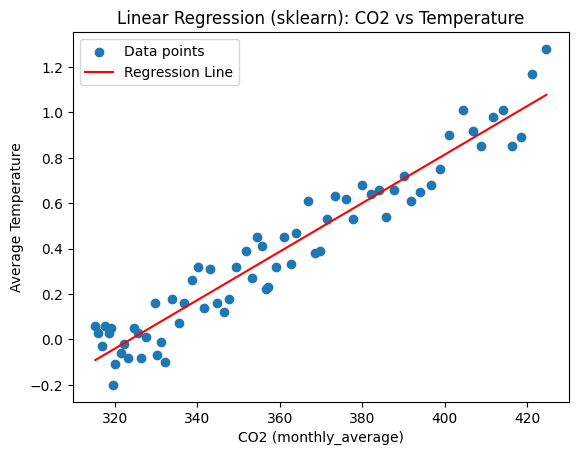

In [18]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

X = merged_df[['monthly_average']]  # 독립변수
Y = merged_df['temperature']     # 종속변수

# 회귀 모델 학습
model = LinearRegression()
model.fit(X, Y)

# 회귀 계수 및 절편 출력
print(f'기울기 (coefficient): {model.coef_[0]}')
print(f'절편 (intercept): {model.intercept_}')
print(f'R^2 score: {model.score(X, Y)}')

# 예측값
Y_pred = model.predict(X)

# 시각화
plt.scatter(X, Y, label='Data points')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel('CO2 (monthly_average)')
plt.ylabel('Average Temperature')
plt.title('Linear Regression (sklearn): CO2 vs Temperature')
plt.legend()
plt.show()


회귀 분석 결과에 따르면, 모델의 기울기는 **0.010682°C per 1 ppm**입니다. **1 ppm 감소를 위해서는 약 2,129,700 메트릭톤의 CO₂가 제거되어야 합니다**.
즉, **1톤의 CO₂ 제거는 약 5×10⁻⁹°C (5 나노도) 온도 하강에 해당**합니다.

이 때, 내가 100만명이 있다면 100만을 곱하면 됩니다. 따라서 **약 0.005 °C 정도 온도가 낮아진다고 추정**이 가능합니다.